# LFV Decays in DLRSM with Degenerate Heavy Neutrinos

This notebook computes lepton flavor violating (LFV) decay branching ratios in the Doublet-Left-Right Symmetric Model (DLRSM) with degenerate heavy neutrino masses.

**Contents:**
1. Setup and Imports
2. Model Parameters
3. Symbolic Form Factor Computation
4. Neutrino Mass Matrix Setup
5. Form Factor Summation
6. Numerical Evaluation
7. h → μτ Branching Ratios
8. μ → eγ Branching Ratios
9. Visualization Functions
10. Parameter Space Exploration

**Authors:** Moises Zeleny Mora  
**Date:** 10/10/2025
**Version:** 1.0

## Quick Start Guide

### Prerequisites
- Python 3.7+
- Required packages: `numpy`, `matplotlib`, `sympy`, `scipy`
- DLRSM model files in the Python path
- LoopTools for Passarino-Veltman functions

### How to Use This Notebook

#### 1. **First-Time Setup**
   - Run cells 1-6 sequentially to:
     - Import all dependencies
     - Define parameter classes
     - Load form factors
     - Setup neutrino mixing
     - Sum over neutrino states
     - Create numerical evaluators

#### 2. **Basic Usage - Single Parameter Point**
   ```python
   # Define parameters
   vR = 1e5      # Right-handed VEV (GeV)
   YR = 1.0      # Right-handed Yukawa
   muX = 1e-3    # Singlet mass (GeV)
   
   # Calculate h → μτ
   BR_h_mutau = h_mutau_calc.calculate_branching_ratio(vR, YR, muX)
   print(f"BR(h → μτ) = {BR_h_mutau:.3e}")
   
   # Calculate μ → eγ
   BR_meg = meg_calc.calculate_branching_ratio(vR, YR, muX)
   print(f"BR(μ → eγ) = {BR_meg:.3e}")
   ```

#### 3. **Parameter Scans**
   ```python
   # Scan over vR
   vR_values = np.logspace(3, 6, 50)  # 10^3 to 10^6 GeV
   BR_h_mutau_scan = h_mutau_calc.scan_vR(vR_values, YR=1.0, muX=1e-3)
   
   # 2D scan over (vR, YR)
   vR_values = np.logspace(3, 6, 30)
   YR_values = np.linspace(0.1, 3.0, 30)
   BR_grid = h_mutau_calc.scan_2d(vR_values, YR_values, muX=1e-3)
   ```

#### 4. **Visualization**
   ```python
   # Plot BR vs vR
   plot_h_mutau_br(
       vR_values, YR=1.0, muX=1e-3,
       h_mutau_calc=h_mutau_calc,
       vR_min=vR_min,
       experimental_bound=h_mutau_calc.EXPERIMENTAL_BOUND
   )
   plt.show()
   ```

#### 5. **Modifying Parameters**
   - **Standard Model**: Modify `sm_params` attributes (masses, couplings)
   - **DLRSM**: Modify `dlrsm_params` attributes (vR, YR, α parameters)
   - **Neutrinos**: Modify `nu_params` attributes (mass splittings)
   
   After modification, re-run the relevant initialization cells.

#### 6. **Exploring New Cases**
   To adapt this notebook for new scenarios:
   
   **a) Different mass hierarchies:**
   - Modify `NeutrinoMixingManager.mass_degeneracy` dictionary
   - Re-run cell 4 (Neutrino Mass Matrix Setup)
   
   **b) Different decay channels:**
   - Change `lepton_a` and `lepton_b` indices in `FormFactorSummation`
   - Update mass values in numerical evaluator
   
   **c) Additional diagrams:**
   - Add new diagram keys to `FormFactorManager.process_h_mutau_formfactors()`
   - Update summation lists in `FormFactorSummation`
   
   **d) Different approximations:**
   - Modify `MuonToEGammaCalculator._setup_approximate_formfactors()`
   - Add custom approximation dictionaries

### Key Classes and Their Methods

| Class | Purpose | Key Methods |
|-------|---------|-------------|
| `StandardModelParameters` | SM parameters | `.lepton_masses` |
| `DLRSMParameters` | DLRSM parameters | `.M1m_mass()`, `.mW2_mass()` |
| `NeutrinoParameters` | Neutrino sector | `.masses_eV`, `.masses_GeV` |
| `FormFactorManager` | Symbolic form factors | `.process_h_mutau_formfactors()` |
| `NeutrinoMixingManager` | Mixing matrices | PMNS, QL, QR, TRL, etc. |
| `FormFactorSummation` | Sum over neutrinos | `.sum_one_fermion_diagrams()` |
| `NumericalEvaluator` | Fast numerical eval | `.evaluate_formfactors()` |
| `HiggsToMuTauCalculator` | BR(h→μτ) | `.calculate_branching_ratio()`, `.scan_vR()`, `.scan_2d()` |
| `MuonToEGammaCalculator` | BR(μ→eγ) | `.calculate_branching_ratio()`, `.scan_2d()` |

### Physical Constraints

- **W' mass bound**: `m_{W'} > 4.5 TeV` → `vR > 1.78 × 10^4 GeV`
- **Perturbativity**: `YR < √(6π) ≈ 4.34`
- **Experimental bounds**:
  - `BR(h → μτ) < 1.8 × 10^-3`
  - `BR(μ → eγ) < 4.2 × 10^-13`

### Troubleshooting

**Issue**: Import errors from DLRSM modules
- **Solution**: Ensure `DLRSM1` directory is in the correct location and check cell 3 output

**Issue**: Numerical evaluation errors
- **Solution**: Check that masses are positive and vR > 0. Avoid extreme parameter values.

**Issue**: Slow computation
- **Solution**: Reduce grid resolution in 2D scans or use coarser vR/YR arrays

**Issue**: Overflow/underflow warnings
- **Solution**: These often occur at extreme parameter values. Filter results with `np.isfinite()`

### Output Files

Results can be saved using:
```python
# Save scan results
np.savez('scan_results.npz', 
         vR=vR_values, YR=YR_values, BR=BR_grid)

# Save figures
plt.savefig('h_mutau_plot.pdf', bbox_inches='tight', dpi=300)
```

### References

- **Model**: Doublet Left-Right Symmetric Model (DLRSM)
- **Form factors**: Pre-computed from `diagram_formfactors_functions_lambdify_epsilon_new.ipynb`
- **Neutrino mixing**: PMNS parametrization with PDG values
- **Loop functions**: LoopTools Passarino-Veltman functions

## 1. Setup and Imports

Import all required libraries and modules for symbolic and numerical computations.

In [1]:
# Standard library imports
import sys
from pathlib import Path
from dataclasses import dataclass
from typing import Dict, Tuple, Callable, Optional

# Scientific computing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Symbolic mathematics
from sympy import (
    Symbol, symbols, conjugate, sin, cos, factor, sqrt, lambdify,
    init_printing, Matrix, log
)

# Initialize pretty printing for SymPy
init_printing()

# Add project directories to Python path
project_root = Path.cwd().parent
dlrsm1_path = Path.cwd() / "DLRSM1"

for path in [project_root, dlrsm1_path]:
    if path.exists() and str(path) not in sys.path:
        sys.path.insert(0, str(path))
        print(f"✓ Added {path} to Python path")
    elif not path.exists():
        print(f"⚠ Warning: {path} not found")

✓ Added /home/moises/LRSM-with-Spheno/sympy_calculations to Python path
✓ Added /home/moises/LRSM-with-Spheno/sympy_calculations/LFV decays DLRSM/DLRSM1 to Python path


In [2]:
# Import DLRSM-specific modules
from diagram_v2 import all_diagrams
from neutrinos import UpmnsStandardParametrization, NuOscObservables

# Model parameters and matrices
from DLRSM1.potential_senjanovic_HiggsDoublets import (
    rho1, k1, vR, epsilon, alpha13, alpha12, alpha23, lamb12, mHR, mH10
)
from DLRSM1.Gauge_Higgs_senjanovic_HiggsDoublets import mW1, mW2, g, mZ1_sym

from DLRSM1.mixing_matrix_iss1 import (
    GRLmat, GSRmat, OmegaRLmat, OmegaSRmat, QLmat, QLDagger, QRmat, QRDagger,
    SRLmat, TRLmat, TSRmat, Kmat, Jmat, muX, Unu,
    m1, m2, m3, M1m, M2m, M3m, M1p, M2p, M3p,
    unitarity_conditions_UnuDaggerUnu, unitarity_conditions_UnuUnuDagger
)

from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import (
    OmegaRL, OmegaSR, QL, QR, TRL, K, J, ml, mn, i, j, a, b
)

# Passarino-Veltman functions
from LFVXD.numeric.looptools_pv import (
    B1_0, B2_0, B1_1, B2_1, B12_0, C0_, C1_, C2_, C00, C11, C12, C22
)
import LFVXD.PaVe2 as PaVe
from LFVXD.PaVe2 import D as Dim, C0 as C0_sym, C1 as C1_sym, C11 as C11_sym, C12 as C12_sym, C22 as C22_sym

# LFV decay functions
from LFVXD.Hdecay_diagrams_v2 import calculate_branching_ratio
from LFVXD import mu_egamma as meg
from LFVXD.diagram_meg import symbolic_formfactor_meg

print("✓ All imports successful")


--- Calculating H10 Interactions ---

--- Calculating Z1 Interactions ---

--- Defining Lepton Interactions with charged fields ---

Refactored script execution finished.


INFO: --- Creating Diagram: triangle_ni_GLp_GLm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_L^+}}-{{G_L^-}}) coupling found: -\alpha_{13}**2*k_1/\rho_1 + 4*\lambda_{12}*k_1
INFO: Vertex 2 ({{G_L^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*T_{RL}[i, b]/k_1, R=sqrt(2)*conjugate(Q_L[b, i])*m_\ell[b]/k_1
INFO: Vertex 3 ({{G_L^-}}-\overline{\ell}[a]-n[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
INFO: Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]
INFO: Successfully created triangle_ni_GLp_GLm (FSS)
INFO: --- Creating Diagram: triangle_ni_GRp_GRm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_R^+}}-{{G_R^-}}) coupling found: -\alpha_{13}**2*k_1**3/(\rho_1*v_R**2) + 4*\lambda_{12}*k_1**3/v_R**2
INFO: Vertex 2 ({{G_R^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*conjugate(Q_R[b, i])*m_\ell[b]/v_R, R=sqrt(2)*conjugate(J[b, i])/v_R
INFO: Vertex 3 ({{G_R^-}}-\overline{\ell}[a]-n[i]) coupling found:

28 diagrams created and stored in all_diagrams dictionary.
   FF 2.0, a package to evaluate one-loop integrals
 written by G. J. van Oldenborgh, NIKHEF-H, Amsterdam
 for the algorithms used see preprint NIKHEF-H 89/17,
 'New Algorithms for One-loop Integrals', by G.J. van
 Oldenborgh and J.A.M. Vermaseren, published in 
 Zeitschrift fuer Physik C46(1990)425.
✓ All imports successful


## 2. Model Parameters Definition

Define physical parameters with type safety and validation.

In [3]:
@dataclass
class StandardModelParameters:
    """Standard Model parameters (all masses in GeV)"""
    me: float = 0.000511  # Electron mass
    mmu: float = 0.105    # Muon mass
    mtau: float = 1.776   # Tau mass
    mW: float = 80.3692   # W boson mass
    mZ: float = 91.1876   # Z boson mass
    mH: float = 125.0     # Higgs mass
    g: float = 0.653      # SU(2) gauge coupling
    k1: float = 246.0     # Electroweak VEV
    
    @property
    def lepton_masses(self) -> np.ndarray:
        """Return array of charged lepton masses"""
        return np.array([self.me, self.mmu, self.mtau])


@dataclass
class DLRSMParameters:
    """DLRSM-specific parameters"""
    vR: float = 1e5       # Right-handed VEV (GeV)
    YR: float = 1.0       # Right-handed Yukawa coupling
    muX: float = 1e-3     # Singlet mass parameter (GeV)
    alpha12: float = 3.5455 + 4.6905  # Higgs potential parameter alpha1 + alpha2
    alpha13: float = 3.5455 + 1.5826  # Higgs potential parameter alpha1 + alpha3
    alpha23: float = 4.6905 - 1.5826  # Higgs potential parameter alpha2 - alpha3
    rho1: float = 0.6641     # Higgs potential parameter
    
    def __post_init__(self):
        """Validate parameters"""
        if self.vR <= 0:
            raise ValueError("vR must be positive")
        if self.YR <= 0:
            raise ValueError("YR must be positive")
        if self.YR > np.sqrt(6 * np.pi):
            print(f"⚠ Warning: YR = {self.YR:.2f} exceeds perturbativity limit {np.sqrt(6*np.pi):.2f}")
    
    @property
    def epsilon(self) -> float:
        """Small expansion parameter epsilon = k1/vR"""
        return 246.0 / self.vR
    
    def M1m_mass(self, sm_params: StandardModelParameters) -> float:
        """Heavy neutrino mass M1m = YR * vR / sqrt(2)"""
        return self.YR * self.vR / np.sqrt(2)
    
    def mW2_mass(self, sm_params: StandardModelParameters) -> float:
        """W' boson mass"""
        return np.sqrt((sm_params.mW**2 / sm_params.k1**2) * (sm_params.k1**2 + self.vR**2))
    
    def mHR_mass(self, sm_params: StandardModelParameters) -> float:
        """Heavy Higgs mass"""
        return np.sqrt(self.alpha23 * (sm_params.k1**2 + self.vR**2))


@dataclass
class NeutrinoParameters:
    """Neutrino sector parameters"""
    dm21_sq: float = 7.42e-5  # Solar mass splitting (eV²)
    dm31_sq: float = 2.515e-3  # Atmospheric mass splitting (eV²)
    m1: float = 1e-12         # Lightest neutrino mass (GeV)
    
    @property
    def masses_eV(self) -> np.ndarray:
        """Light neutrino masses in eV"""
        m1_eV = self.m1 * 1e9  # Convert GeV to eV
        m2_eV = np.sqrt(m1_eV**2 + self.dm21_sq)
        m3_eV = np.sqrt(m1_eV**2 + self.dm31_sq)
        return np.array([m1_eV, m2_eV, m3_eV])
    
    @property
    def masses_GeV(self) -> np.ndarray:
        """Light neutrino masses in GeV"""
        return self.masses_eV * 1e-9


# Create default parameter sets
sm_params = StandardModelParameters()
dlrsm_params = DLRSMParameters()
nu_params = NeutrinoParameters()

print("✓ Parameter classes defined")
print(f"  Light neutrino masses: {nu_params.masses_eV} eV")
print(f"  Heavy neutrino M1m: {dlrsm_params.M1m_mass(sm_params):.2e} GeV")
print(f"  W' mass: {dlrsm_params.mW2_mass(sm_params):.2e} GeV")

✓ Parameter classes defined
  Light neutrino masses: [0.001      0.00867179 0.05015974] eV
  Heavy neutrino M1m: 7.07e+04 GeV
  W' mass: 3.27e+04 GeV


## 3. Symbolic Form Factor Computation

Load and organize pre-computed symbolic form factors from diagram calculations.

In [4]:
class FormFactorManager:
    """Manage symbolic form factors for LFV decays"""
    
    def __init__(self):
        """Initialize form factor expressions"""
        # Define symbolic variables for substitution
        self.mla, self.mlb, self.mni, self.mnj = symbols(
            'm_{l_a}, m_{l_b}, m_{n_i}, m_{n_j}', positive=True
        )
        
        # Mixing matrix elements (symbolic)
        self.symbolic_elements = self._define_symbolic_elements()
        
        # Substitution dictionary
        self.symbolic_changes = self._build_substitution_dict()
        
        # Load diagrams
        self.h_mutau_diagrams = all_diagrams
        self.meg_diagrams = symbolic_formfactor_meg
        
        print("✓ FormFactorManager initialized")
    
    def _define_symbolic_elements(self) -> Dict:
        """Define symbolic placeholders for mixing matrix elements"""
        elements = {}
        
        # Q_L matrix elements
        for suffix in ['ai', 'bi', 'bj']:
            elements[f'QL{suffix}'] = symbols(f'Q_{{L{suffix}}}')
            elements[f'QL{suffix}c'] = symbols(f'\\overline{{Q_{{L{suffix}}}}}')
        
        # Q_R matrix elements
        for suffix in ['ai', 'bi', 'bj']:
            elements[f'QR{suffix}'] = symbols(f'Q_{{R{suffix}}}')
            elements[f'QR{suffix}c'] = symbols(f'\\overline{{Q_{{R{suffix}}}}}')
        
        # T_RL matrix elements
        for suffix in ['ia', 'ib', 'jb']:
            elements[f'TRL{suffix}'] = symbols(f'T_{{RL{suffix}}}')
            elements[f'TRL{suffix}c'] = symbols(f'\\overline{{T_{{RL{suffix}}}}}')
        
        # J and K matrix elements
        for matrix in ['J', 'K']:
            for suffix in ['ai', 'bi', 'bj']:
                elements[f'{matrix}{suffix}'] = symbols(f'{matrix}_{{{suffix}}}')
                elements[f'{matrix}{suffix}c'] = symbols(f'\\overline{{{matrix}_{{{suffix}}}}}')
        
        # Omega matrices
        elements['OmegaRLij'] = symbols(r'\Omega_{RLij}')
        elements['OmegaRLijc'] = symbols(r'\overline{\Omega_{RLij}}')
        elements['OmegaSRij'] = symbols(r'\Omega_{SRij}')
        elements['OmegaSRijc'] = symbols(r'\overline{\Omega_{SRij}}')
        
        return elements
    
    def _build_substitution_dict(self) -> Dict:
        """Build substitution dictionary for symbolic evaluation"""
        sub_dict = {
            ml[a]: self.mla,
            ml[b]: self.mlb,
            mn[i]: self.mni,
            mn[j]: self.mnj,
            Dim: 4,  # Spacetime dimension
        }
        
        # Add mixing matrix substitutions
        elements = self.symbolic_elements
        
        # Q_L substitutions
        sub_dict.update({
            QL[a, i]: elements['QLai'],
            QL[b, i]: elements['QLbi'],
            QL[b, j]: elements['QLbj'],
            conjugate(QL[a, i]): elements['QLaic'],
            conjugate(QL[b, i]): elements['QLbic'],
            conjugate(QL[b, j]): elements['QLbjc'],
        })
        
        # Q_R substitutions
        sub_dict.update({
            QR[a, i]: elements['QRai'],
            QR[b, i]: elements['QRbi'],
            QR[b, j]: elements['QRbj'],
            conjugate(QR[a, i]): elements['QRaic'],
            conjugate(QR[b, i]): elements['QRbic'],
            conjugate(QR[b, j]): elements['QRbjc'],
        })
        
        # T_RL substitutions
        sub_dict.update({
            TRL[i, a]: elements['TRLia'],
            TRL[i, b]: elements['TRLib'],
            TRL[j, b]: elements['TRLjb'],
            conjugate(TRL[i, a]): elements['TRLiac'],
            conjugate(TRL[i, b]): elements['TRLibc'],
            conjugate(TRL[j, b]): elements['TRLjbc'],
        })
        
        # J and K substitutions
        for matrix_sym, matrix_name in [(J, 'J'), (K, 'K')]:
            sub_dict.update({
                matrix_sym[a, i]: elements[f'{matrix_name}ai'],
                matrix_sym[b, i]: elements[f'{matrix_name}bi'],
                matrix_sym[b, j]: elements[f'{matrix_name}bj'],
                conjugate(matrix_sym[a, i]): elements[f'{matrix_name}aic'],
                conjugate(matrix_sym[b, i]): elements[f'{matrix_name}bic'],
                conjugate(matrix_sym[b, j]): elements[f'{matrix_name}bjc'],
            })
        
        # Omega matrices
        sub_dict.update({
            OmegaRL[i, j]: elements['OmegaRLij'],
            conjugate(OmegaRL[i, j]): elements['OmegaRLijc'],
            OmegaSR[i, j]: elements['OmegaSRij'],
            conjugate(OmegaSR[i, j]): elements['OmegaSRijc'],
        })
        
        return sub_dict
    
    def process_h_mutau_formfactors(self) -> Dict:
        """Process form factors for h → μτ decay"""
        print("Processing h → μτ form factors...")
        
        # Categorize diagrams
        bubbles = ['ni_GL', 'GL_ni', 'ni_GR', 'GR_ni', 'ni_HR', 'HR_ni', 
                   'ni_W1', 'W1_ni', 'ni_W2', 'W2_ni']
        
        triangles_one_fermion = [
            'ni_GLp_GLm', 'ni_GRp_GRm', 'ni_HRp_HRm', 'ni_W1p_W1m', 'ni_W2p_W2m',
            'ni_GRp_HRm', 'ni_HRp_GRm', 'ni_W1p_GLm', 'ni_W2p_GRm', 'ni_W2p_HRm',
            'ni_GLp_W1m', 'ni_GRp_W2m', 'ni_HRp_W2m'
        ]
        
        triangles_two_fermion = ['GL_ninj', 'GR_ninj', 'HR_ninj', 'W1_ninj', 'W2_ninj']
        
        # Process each category
        formfactors = {}
        
        for interaction in bubbles + triangles_one_fermion + triangles_two_fermion:
            diagram = self.h_mutau_diagrams[interaction]
            formfactors[interaction] = {
                'AL': self._factor_pv_functions(
                    diagram.AL().factor().subs(self.symbolic_changes)
                ),
                'AR': self._factor_pv_functions(
                    diagram.AR().factor().subs(self.symbolic_changes)
                )
            }
        
        print(f"✓ Processed {len(formfactors)} diagram contributions")
        return formfactors
    
    def _factor_pv_functions(self, expr):
        """Factor Passarino-Veltman functions in expression"""
        pv_funcs = list(expr.atoms(PaVe.PaVeFunction))
        if pv_funcs:
            expr = expr.expand().collect(pv_funcs, lambda x: factor(x))
        return expr


# Initialize form factor manager
ff_manager = FormFactorManager()
h_mutau_ff = ff_manager.process_h_mutau_formfactors()

✓ FormFactorManager initialized
Processing h → μτ form factors...
✓ Processed 28 diagram contributions


## 4. Neutrino Mass Matrix Setup

Configure the neutrino mass spectrum with degenerate heavy neutrinos and mixing matrices.

In [5]:
class NeutrinoMixingManager:
    """Manage neutrino mass matrices and mixing"""
    
    def __init__(self, nu_params: NeutrinoParameters):
        """Initialize with neutrino parameters"""
        self.nu_params = nu_params
        
        # Define mass degeneracy
        self.mass_degeneracy = {
            M2m: M1m, M3m: M1m,
            M1p: M1m, M2p: M1m, M3p: M1m
        }
        
        # Setup PMNS matrix
        self.pmns_matrix = self._setup_pmns_matrix()
        
        # Apply simplifications to mixing matrices
        self.mixing_matrices = self._setup_mixing_matrices()
        
        print("✓ Neutrino mixing initialized")
    
    def _setup_pmns_matrix(self) -> Matrix:
        """Setup PMNS matrix with experimental values"""
        # Get neutrino oscillation data
        Nudata = NuOscObservables()
        
        # Define mixing angles
        th12, th13, th23 = symbols(r'\theta_{12}, \theta_{13}, \theta_{23}')
        mixing_angles = Nudata.substitutions(th12, th13, th23)
        
        # Build PMNS matrix
        pmns = UpmnsStandardParametrization(th12, th13, th23).subs(mixing_angles)
        
        # Create substitution dictionary
        self.unu_substitutions = {
            Unu[i, j]: pmns[i, j] for i in range(3) for j in range(3)
        }
        
        print(f"  PMNS matrix mixing angles: θ₁₂={float(th12.subs(mixing_angles)):.4f}, "
              f"θ₁₃={float(th13.subs(mixing_angles)):.4f}, θ₂₃={float(th23.subs(mixing_angles)):.4f}")
        
        return pmns
    
    def _setup_mixing_matrices(self) -> Dict:
        """Setup all mixing matrices with degeneracy and unitarity"""
        matrices = {}
        
        # Helper function to apply conditions
        def simplify_matrix(mat):
            return mat.subs(self.mass_degeneracy).applyfunc(
                lambda x: factor(x.subs(unitarity_conditions_UnuDaggerUnu)
                                 .subs(unitarity_conditions_UnuUnuDagger))
            )
        
        # Process each mixing matrix
        matrices['QL'] = QLmat.subs(self.mass_degeneracy)
        matrices['QR'] = QRmat.subs(self.mass_degeneracy)
        matrices['TRL'] = simplify_matrix(TRLmat)
        matrices['K'] = simplify_matrix(Kmat.applyfunc(lambda x: x.collect([muX], factor)))
        matrices['J'] = simplify_matrix(Jmat.applyfunc(lambda x: x.collect([muX], factor)))
        matrices['OmegaRL'] = simplify_matrix(OmegaRLmat)
        matrices['OmegaSR'] = simplify_matrix(OmegaSRmat)
        
        print(f"✓ Setup {len(matrices)} mixing matrices")
        return matrices


# Initialize neutrino mixing
nu_mixing = NeutrinoMixingManager(nu_params)

  PMNS matrix mixing angles: θ₁₂=0.5905, θ₁₃=0.1503, θ₂₃=0.8435
✓ Setup 7 mixing matrices
✓ Neutrino mixing initialized


## 5. Form Factor Summation Over Neutrinos

Sum form factor contributions over all nine neutrino mass eigenstates.

In [6]:
class FormFactorSummation:
    """Sum form factors over neutrino states"""
    
    def __init__(self, formfactors: Dict, mixing_manager: NeutrinoMixingManager, 
                 ff_manager: FormFactorManager):
        """Initialize with form factors and mixing"""
        self.formfactors = formfactors
        self.mixing = mixing_manager
        self.ff_mgr = ff_manager
        
        # Neutrino mass list
        self.neutrino_masses = [m1, m2, m3, M1m, M2m, M3m, M1p, M2p, M3p]
        
        # Lepton indices for μ → τ
        self.lepton_a = 1  # muon
        self.lepton_b = 2  # tau
        
    def sum_one_fermion_diagrams(self) -> Tuple[any, any]:
        """Sum over diagrams with one fermion in the loop"""
        diagrams = [
            'ni_GL', 'GL_ni', 'ni_GR', 'GR_ni', 'ni_HR', 'HR_ni',
            'ni_W1', 'W1_ni', 'ni_W2', 'W2_ni',
            'ni_GLp_GLm', 'ni_GRp_GRm', 'ni_HRp_HRm', 
            'ni_W1p_W1m', 'ni_W2p_W2m',
            'ni_GRp_HRm', 'ni_HRp_GRm', 'ni_W1p_GLm',
            'ni_W2p_GRm', 'ni_W2p_HRm', 'ni_GLp_W1m',
            'ni_GRp_W2m', 'ni_HRp_W2m'
        ]
        
        AL_total = 0
        AR_total = 0
        
        print("Summing one-fermion diagrams over 9 neutrino states...")
        
        for interaction in diagrams:
            ff = self.formfactors[interaction]
            
            for nu_idx in range(9):
                # Build substitution for this neutrino
                subs = self._one_neutrino_substitutions(nu_idx)
                
                # Add contribution
                AL_total += ff['AL'].subs(subs)
                AR_total += ff['AR'].subs(subs)
        
        print("✓ One-fermion summation complete")
        return AL_total, AR_total
    
    def sum_two_fermion_diagrams(self) -> Tuple[any, any]:
        """Sum over diagrams with two fermions in the loop"""
        diagrams = ['GL_ninj', 'GR_ninj', 'HR_ninj', 'W1_ninj', 'W2_ninj']
        
        AL_total = 0
        AR_total = 0
        
        print("Summing two-fermion diagrams over 9×9 neutrino pairs...")
        
        for interaction in diagrams:
            ff = self.formfactors[interaction]
            
            for nu_i in range(9):
                for nu_j in range(9):
                    # Build substitution for this neutrino pair
                    subs = self._two_neutrino_substitutions(nu_i, nu_j)
                    
                    # Add contribution
                    AL_total += ff['AL'].subs(subs)
                    AR_total += ff['AR'].subs(subs)
        
        print("✓ Two-fermion summation complete")
        return AL_total, AR_total
    
    def _one_neutrino_substitutions(self, nu_idx: int) -> Dict:
        """Build substitution dictionary for one neutrino"""
        a, b = self.lepton_a, self.lepton_b
        elements = self.ff_mgr.symbolic_elements
        mixing = self.mixing.mixing_matrices
        
        return {
            self.ff_mgr.mla: ml[a],
            self.ff_mgr.mlb: ml[b],
            self.ff_mgr.mni: self.neutrino_masses[nu_idx],
            elements['Kai']: mixing['K'][a, nu_idx],
            elements['Kbi']: mixing['K'][b, nu_idx],
            elements['Kaic']: conjugate(mixing['K'][a, nu_idx]),
            elements['Kbic']: conjugate(mixing['K'][b, nu_idx]),
            elements['QRai']: mixing['QR'][a, nu_idx],
            elements['QRbi']: mixing['QR'][b, nu_idx],
            elements['QRaic']: conjugate(mixing['QR'][a, nu_idx]),
            elements['QRbic']: conjugate(mixing['QR'][b, nu_idx]),
            elements['QLai']: mixing['QL'][a, nu_idx],
            elements['QLbi']: mixing['QL'][b, nu_idx],
            elements['QLaic']: conjugate(mixing['QL'][a, nu_idx]),
            elements['QLbic']: conjugate(mixing['QL'][b, nu_idx]),
            elements['TRLia']: mixing['TRL'][nu_idx, a],
            elements['TRLib']: mixing['TRL'][nu_idx, b],
            elements['TRLiac']: conjugate(mixing['TRL'][nu_idx, a]),
            elements['TRLibc']: conjugate(mixing['TRL'][nu_idx, b]),
            elements['Jai']: mixing['J'][a, nu_idx],
            elements['Jbi']: mixing['J'][b, nu_idx],
            elements['Jaic']: conjugate(mixing['J'][a, nu_idx]),
            elements['Jbic']: conjugate(mixing['J'][b, nu_idx]),
        }
    
    def _two_neutrino_substitutions(self, nu_i: int, nu_j: int) -> Dict:
        """Build substitution dictionary for two neutrinos"""
        a, b = self.lepton_a, self.lepton_b
        elements = self.ff_mgr.symbolic_elements
        mixing = self.mixing.mixing_matrices
        
        return {
            self.ff_mgr.mla: ml[a],
            self.ff_mgr.mlb: ml[b],
            self.ff_mgr.mni: self.neutrino_masses[nu_i],
            self.ff_mgr.mnj: self.neutrino_masses[nu_j],
            elements['Kai']: mixing['K'][a, nu_i],
            elements['Kbjc']: conjugate(mixing['K'][b, nu_j]),
            elements['QRai']: mixing['QR'][a, nu_i],
            elements['QRbjc']: conjugate(mixing['QR'][b, nu_j]),
            elements['QLai']: mixing['QL'][a, nu_i],
            elements['QLbjc']: conjugate(mixing['QL'][b, nu_j]),
            elements['TRLjb']: mixing['TRL'][nu_j, b],
            elements['TRLiac']: conjugate(mixing['TRL'][nu_i, a]),
            elements['Jai']: mixing['J'][a, nu_i],
            elements['Jbjc']: conjugate(mixing['J'][b, nu_j]),
            elements['OmegaRLij']: mixing['OmegaRL'][nu_i, nu_j],
            elements['OmegaRLijc']: conjugate(mixing['OmegaRL'][nu_i, nu_j]),
        }


# Perform summations
ff_summation = FormFactorSummation(h_mutau_ff, nu_mixing, ff_manager)
AL_one, AR_one = ff_summation.sum_one_fermion_diagrams()
AL_two, AR_two = ff_summation.sum_two_fermion_diagrams()

print(f"\n✓ Form factor summation complete")
print(f"  One-fermion: {len(AL_one.free_symbols)} free symbols")
print(f"  Two-fermion: {len(AL_two.free_symbols)} free symbols")

Summing one-fermion diagrams over 9 neutrino states...
✓ One-fermion summation complete
Summing two-fermion diagrams over 9×9 neutrino pairs...
✓ Two-fermion summation complete

✓ Form factor summation complete
  One-fermion: 27 free symbols
  Two-fermion: 22 free symbols


## 6. Numerical Evaluation Functions

Create lambdified functions for efficient numerical evaluation.

In [7]:
class NumericalEvaluator:
    """Convert symbolic expressions to fast numerical functions"""
    
    def __init__(self, AL_one, AR_one, AL_two, AR_two, 
                 nu_mixing: NeutrinoMixingManager,
                 sm_params: StandardModelParameters,
                 dlrsm_params: DLRSMParameters):
        """Initialize with symbolic expressions and parameters"""
        self.sm = sm_params
        self.dlrsm = dlrsm_params
        
        # Apply numerical substitutions
        print("Applying numerical substitutions...")
        self.AL_one_num = self._apply_numerical_subs(AL_one)
        self.AR_one_num = self._apply_numerical_subs(AR_one)
        self.AL_two_num = self._apply_numerical_subs(AL_two)
        self.AR_two_num = self._apply_numerical_subs(AR_two)
        
        # Passarino-Veltman function mapping
        self.pv_functions = {
            'B1_0': B1_0, 'B2_0': B2_0, 'B1_1': B1_1, 
            'B2_1': B2_1, 'B12_0': B12_0,
            'C0': C0_, 'C1': C1_, 'C2': C2_,
            'C00': C00, 'C11': C11, 'C12': C12, 'C22': C22
        }
        
        # Create lambdified functions
        print("Creating lambdified functions...")
        self._create_lambdified_functions()
        
        print("✓ Numerical evaluator ready")
    
    def _apply_numerical_subs(self, expr):
        """Apply numerical parameter substitutions"""
        # Get lamb12 from mH10
        lamb12_val = (self.sm.mH**2 / (8 * self.sm.k1**2) + 
                     self.dlrsm.alpha13**2 / (4 * self.dlrsm.rho1))
        
        subs = {
            alpha12: self.dlrsm.alpha12,
            alpha13: self.dlrsm.alpha13,
            alpha23: self.dlrsm.alpha23,
            lamb12: lamb12_val,
            rho1: self.dlrsm.rho1,
            g: self.sm.g,
            k1: self.sm.k1,
            mH10: self.sm.mH,
            ml[0]: self.sm.me,
            ml[1]: self.sm.mmu,
            ml[2]: self.sm.mtau,
            epsilon: k1 / vR,  # Will be substituted with specific vR values
        }
        
        # Apply mass degeneracy
        expr = expr.subs({
            M2m: M1m, M3m: M1m,
            M1p: M1m, M2p: M1m, M3p: M1m
        })
        
        # Apply PMNS matrix
        from neutrinos import NuOscObservables
        Nudata = NuOscObservables()
        th12, th13, th23 = symbols(r'\theta_{12}, \theta_{13}, \theta_{23}')
        mixing_angles = Nudata.substitutions(th12, th13, th23)
        c12, c13, c23 = cos(th12), cos(th13), cos(th23)
        s12, s13, s23 = sin(th12), sin(th13), sin(th23)
        pmns = UpmnsStandardParametrization(th12, th13, th23).subs(mixing_angles)
        
        unu_subs = {Unu[i, j]: pmns[i, j] for i in range(3) for j in range(3)}
        
        return expr.subs(subs).subs(unu_subs)
    
    def _create_lambdified_functions(self):
        """Create fast numerical evaluation functions"""
        # Arguments: (m1, m2, m3, M1m, mW1, mW2, mHR, vR, muX)
        args = (m1, m2, m3, M1m, mW1, mW2, mHR, vR, muX)
        
        self.AL_one_func = lambdify(args, self.AL_one_num, 
                                    modules=[self.pv_functions, 'numpy'])
        self.AR_one_func = lambdify(args, self.AR_one_num,
                                    modules=[self.pv_functions, 'numpy'])
        self.AL_two_func = lambdify(args, self.AL_two_num,
                                    modules=[self.pv_functions, 'numpy'])
        self.AR_two_func = lambdify(args, self.AR_two_num,
                                    modules=[self.pv_functions, 'numpy'])
    
    def evaluate_formfactors(self, vR_val: float, YR_val: float, muX_val: float,
                            mn_vals: np.ndarray) -> Dict[str, complex]:
        """Evaluate form factors at given parameter point"""
        # Compute derived masses
        M1m_val = YR_val * vR_val / np.sqrt(2)
        mW2_val = np.sqrt((self.sm.mW**2 / self.sm.k1**2) * 
                         (self.sm.k1**2 + vR_val**2))
        mHR_val = np.sqrt(self.dlrsm.alpha23 * (self.sm.k1**2 + vR_val**2))
        
        # Evaluate each form factor
        AL_one = self.AL_one_func(
            mn_vals[0], mn_vals[1], mn_vals[2], M1m_val,
            self.sm.mW, mW2_val, mHR_val, vR_val, muX_val
        )
        AR_one = self.AR_one_func(
            mn_vals[0], mn_vals[1], mn_vals[2], M1m_val,
            self.sm.mW, mW2_val, mHR_val, vR_val, muX_val
        )
        AL_two = self.AL_two_func(
            mn_vals[0], mn_vals[1], mn_vals[2], M1m_val,
            self.sm.mW, mW2_val, mHR_val, vR_val, muX_val
        )
        AR_two = self.AR_two_func(
            mn_vals[0], mn_vals[1], mn_vals[2], M1m_val,
            self.sm.mW, mW2_val, mHR_val, vR_val, muX_val
        )
        
        return {
            'AL': AL_one + AL_two,
            'AR': AR_one + AR_two,
            'AL_one': AL_one,
            'AR_one': AR_one,
            'AL_two': AL_two,
            'AR_two': AR_two
        }


# Create numerical evaluator
num_eval = NumericalEvaluator(
    AL_one, AR_one, AL_two, AR_two,
    nu_mixing, sm_params, dlrsm_params
)

Applying numerical substitutions...
Creating lambdified functions...
✓ Numerical evaluator ready


## 7. h → μτ Branching Ratio Calculations

Compute branching ratios for Higgs decay to muon-tau.

In [32]:
class HiggsToMuTauCalculator:
    """Calculate BR(h → μτ) in DLRSM"""
    
    # Experimental upper bound
    EXPERIMENTAL_BOUND = {
        'ATLAS-2023':0.0018,
        'HL-LHC':5e-4,
        '$\\mu$C':7.7e-5
    }
    
    # Perturbativity limit
    YR_PERTURBATIVE_LIMIT = np.sqrt(6 * np.pi)
    
    # W' mass lower bound (from collider searches)
    WPRIME_MASS_BOUND = 5400.0  # GeV
    
    def __init__(self, num_evaluator: NumericalEvaluator,
                 sm_params: StandardModelParameters,
                 nu_params: NeutrinoParameters):
        """Initialize calculator"""
        self.evaluator = num_evaluator
        self.sm = sm_params
        self.nu = nu_params
        
        # Vectorize BR calculation
        self.calculate_br_vec = np.vectorize(calculate_branching_ratio)
        
        print("✓ h → μτ calculator initialized")
    
    def calculate_branching_ratio(self, vR: float, YR: float, muX: float) -> float:
        """Calculate BR(h → μτ) at a parameter point"""
        # Get form factors
        ff = self.evaluator.evaluate_formfactors(
            vR, YR, muX, self.nu.masses_GeV
        )
        
        # Total form factors
        AL_total = ff['AL']
        AR_total = ff['AR']
        
        # Calculate branching ratio
        BR = calculate_branching_ratio(
            AL_total, AR_total, self.sm.mH, self.sm.mmu, self.sm.mtau
        )
        
        return BR
    
    def scan_vR(self, vR_values: np.ndarray, YR: float, muX: float) -> np.ndarray:
        """Scan over vR values"""
        BR_values = np.zeros_like(vR_values)
        
        for idx, vR in enumerate(vR_values):
            BR_values[idx] = self.calculate_branching_ratio(vR, YR, muX)
        
        return BR_values
    
    def scan_YR(self, vR: float, YR_values: np.ndarray, muX: float) -> np.ndarray:
        """Scan over YR values"""
        BR_values = np.zeros_like(YR_values)
        
        for idx, YR in enumerate(YR_values):
            BR_values[idx] = self.calculate_branching_ratio(vR, YR, muX)
        
        return BR_values
    
    def scan_2d(self, vR_values: np.ndarray, YR_values: np.ndarray, 
                muX: float) -> np.ndarray:
        """2D parameter scan over (vR, YR)"""
        vR_grid, YR_grid = np.meshgrid(vR_values, YR_values)
        BR_grid = np.zeros_like(vR_grid)
        
        total = vR_grid.size
        print(f"Running 2D scan: {len(vR_values)}×{len(YR_values)} = {total} points...")
        
        for i in range(vR_grid.shape[0]):
            for j in range(vR_grid.shape[1]):
                BR_grid[i, j] = self.calculate_branching_ratio(
                    vR_grid[i, j], YR_grid[i, j], muX
                )
            
            if (i+1) % 10 == 0:
                print(f"  Progress: {(i+1)*vR_grid.shape[1]}/{total} points")
        
        print("✓ 2D scan complete")
        return BR_grid
    
    @staticmethod
    def vR_from_mWprime(mWprime: float, mW: float = 80.3692, 
                        k1: float = 246.0) -> float:
        """Calculate vR from W' mass bound"""
        # m_{W'}^2 = (m_W^2/k1^2)(k1^2 + vR^2)
        # Solving for vR:
        return np.sqrt((mWprime**2 * k1**2 / mW**2) - k1**2)


# Create calculator
h_mutau_calc = HiggsToMuTauCalculator(num_eval, sm_params, nu_params)

# Calculate minimum vR from W' bound
vR_min = h_mutau_calc.vR_from_mWprime(h_mutau_calc.WPRIME_MASS_BOUND)
print(f"Minimum vR from W' mass: {vR_min:.2e} GeV")

✓ h → μτ calculator initialized
Minimum vR from W' mass: 1.65e+04 GeV


## 8. μ → eγ Branching Ratio Calculations

Compute branching ratios for muon to electron-gamma decay.

In [33]:
class MuonToEGammaCalculator:
    """Calculate BR(μ → eγ) in DLRSM"""
    
    # MEG experimental upper bound
    MEG_BOUND = {
        'MEG-II-2025':1.5e-13,
        'MEG-II-future':6e-14
    }
    
    def __init__(self, sm_params: StandardModelParameters,
                 dlrsm_params: DLRSMParameters,
                 nu_params: NeutrinoParameters,
                 nu_mixing: NeutrinoMixingManager,
                 ff_manager: FormFactorManager):
        """Initialize calculator with analytic approximations"""
        self.sm = sm_params
        self.dlrsm = dlrsm_params
        self.nu = nu_params
        self.mixing = nu_mixing
        self.ff_mgr = ff_manager
        
        # Setup approximate form factors
        self._setup_approximate_formfactors()
        
        # Vectorize width calculation
        self.width_meg_vec = np.vectorize(meg.width_mu_to_e_gamma)
        
        print("✓ μ → eγ calculator initialized")
    
    def _setup_approximate_formfactors(self):
        """Setup analytic approximations for heavy mass limit"""
        print("Setting up μ → eγ form factors with heavy mass approximations...")
        
        # Define approximation variables
        t, ms, mf = symbols('t m_s, m_f', positive=True)
        
        # Scalar contributions (for HR, GL, GR)
        c1_lim = (t**2 - 2*t*log(t) - 1) / (2*ms**2*(t-1)**3)
        c11_lim = -((t**3 - 6*t**2 + 3*t + 6*t*log(t) + 2) / (6*ms**2*(t-1)**4))
        c12_lim = (-2*t**3 - 3*t**2 + 6*t**2*log(t) + 6*t - 1) / (12*ms**2*(t-1)**4)
        
        # Vector contributions (for W, W2)
        c0_limW = (t - t*log(t) - 1) / (ms**2*(t-1)**2)
        c1_limW = (t - t*log(t) - 1) / (ms**2*(t-1)**2)
        c11_limW = -((t**3 - 6*t**2 + 3*t + 6*t*log(t) + 2) / (6*ms**2*(t-1)**4))
        c12_limW = (11*t**3 - 6*t**3*log(t) - 18*t**2 + 9*t - 2) / (18*ms**2*(t-1)**4)
        c22_limW = -((t**3 - 6*t**2 + 3*t + 6*t*log(t) + 2) / (6*ms**2*(t-1)**4))
        
        # Build approximation dictionaries
        mla, mlb, mni = self.ff_mgr.mla, self.ff_mgr.mlb, self.ff_mgr.mni
        
        self.scalar_approx = lambda mS: {
            C1_sym(mla**2, mlb**2, 0, mS**2, mni**2, mS**2): 
                c1_lim.subs(t, mni**2/mS**2).subs(ms, mS).factor(),
            C11_sym(mla**2, mlb**2, 0, mS**2, mni**2, mS**2): 
                c11_lim.subs(t, mni**2/mS**2).subs(ms, mS).factor(),
            C12_sym(0, mla**2, mlb**2, mS**2, mS**2, mni**2): 
                c12_lim.subs(t, mni**2/mS**2).subs(ms, mS).factor()
        }
        
        self.vector_approx = lambda mV: {
            C0_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): 
                c0_limW.subs(t, mni**2/mV**2).subs(ms, mV).factor(),
            C1_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): 
                c1_limW.subs(t, mni**2/mV**2).subs(ms, mV).factor(),
            C1_sym(mla**2, mlb**2, 0, mV**2, mni**2, mV**2): 
                c1_limW.subs(t, mni**2/mV**2).subs(ms, mV).factor(),
            C11_sym(mla**2, mlb**2, 0, mV**2, mni**2, mV**2): 
                c11_limW.subs(t, mni**2/mV**2).subs(ms, mV).factor(),
            C12_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): 
                c12_limW.subs(t, mni**2/mV**2).subs(ms, mV).factor(),
            C22_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): 
                c22_limW.subs(t, mni**2/mV**2).subs(ms, mV).factor()
        }
        
        # Process MEG form factors
        self._process_meg_formfactors()
        
        print("✓ Analytic approximations applied")
    
    def _process_meg_formfactors(self):
        """Process and sum MEG form factors"""
        # Map contributions to masses
        contribution_mass = {
            'Wpm': mW1,
            'W2pm': mW2,
            'GLpm': mW1,
            'GRpm': mW2,
            'HRpm': mHR
        }
        
        # Sum over neutrinos for each contribution
        mll = symbols(r'm_e m_\mu m_\tau', positive=True)
        a_idx, b_idx = 0, 1  # e → μ
        
        sigmaL_total = 0
        sigmaR_total = 0
        
        for contribution, formfactor in symbolic_formfactor_meg.items():
            # Apply substitutions
            ffL_sub = formfactor['sigmaL'].subs(self.ff_mgr.symbolic_changes)
            ffR_sub = formfactor['sigmaR'].subs(self.ff_mgr.symbolic_changes)
            
            # Apply approximations
            if contribution in ['HRpm', 'GLpm', 'GRpm']:
                ffL = ffL_sub.subs(self.scalar_approx(contribution_mass[contribution]))
                ffR = ffR_sub.subs(self.scalar_approx(contribution_mass[contribution]))
            elif contribution in ['Wpm', 'W2pm']:
                ffL = ffL_sub.subs(self.vector_approx(contribution_mass[contribution]))
                ffR = ffR_sub.subs(self.vector_approx(contribution_mass[contribution]))
            else:
                continue
            
            # Sum over 9 neutrinos
            for r in range(9):
                subs = self._one_neutrino_subs_meg(r, a_idx, b_idx, mll)
                sigmaL_total += ffL.subs(subs)
                sigmaR_total += ffR.subs(subs)
        
        # Apply numerical values and create lambdified functions
        numeric_subs = {
            mll[0]: self.sm.me,
            mll[1]: self.sm.mmu,
            mll[2]: self.sm.mtau,
            mW1: self.sm.mW,
            mZ1_sym: self.sm.mZ,
            k1: self.sm.k1,
            epsilon: k1 / vR
        }
        
        # Apply mass degeneracy and PMNS
        mass_degen = {M2m: M1m, M3m: M1m, M1p: M1m, M2p: M1m, M3p: M1m}
        
        sigmaL_num = sigmaL_total.subs(numeric_subs).subs(mass_degen).subs(
            self.mixing.unu_substitutions
        )
        sigmaR_num = sigmaR_total.subs(numeric_subs).subs(mass_degen).subs(
            self.mixing.unu_substitutions
        )
        
        # Create lambdified functions
        args = (m1, m2, m3, M1m, mHR, mW2, k1, vR, muX)
        self.sigmaL_func = lambdify(args, sigmaL_num, modules=['numpy'])
        self.sigmaR_func = lambdify(args, sigmaR_num, modules=['numpy'])
    
    def _one_neutrino_subs_meg(self, nu_idx: int, a: int, b: int, mll) -> Dict:
        """Build substitution for MEG with one neutrino"""
        neutrino_masses = [m1, m2, m3, M1m, M2m, M3m, M1p, M2p, M3p]
        elements = self.ff_mgr.symbolic_elements
        mixing = self.mixing.mixing_matrices
        
        return {
            self.ff_mgr.mla: mll[a],
            self.ff_mgr.mlb: mll[b],
            self.ff_mgr.mni: neutrino_masses[nu_idx],
            elements['Kai']: mixing['K'][a, nu_idx],
            elements['Kbi']: mixing['K'][b, nu_idx],
            elements['Kaic']: conjugate(mixing['K'][a, nu_idx]),
            elements['Kbic']: conjugate(mixing['K'][b, nu_idx]),
            elements['QRai']: mixing['QR'][a, nu_idx],
            elements['QRbi']: mixing['QR'][b, nu_idx],
            elements['QRaic']: conjugate(mixing['QR'][a, nu_idx]),
            elements['QRbic']: conjugate(mixing['QR'][b, nu_idx]),
            elements['QLai']: mixing['QL'][a, nu_idx],
            elements['QLbi']: mixing['QL'][b, nu_idx],
            elements['QLaic']: conjugate(mixing['QL'][a, nu_idx]),
            elements['QLbic']: conjugate(mixing['QL'][b, nu_idx]),
            elements['TRLia']: mixing['TRL'][nu_idx, a],
            elements['TRLib']: mixing['TRL'][nu_idx, b],
            elements['TRLiac']: conjugate(mixing['TRL'][nu_idx, a]),
            elements['TRLibc']: conjugate(mixing['TRL'][nu_idx, b]),
            elements['Jai']: mixing['J'][a, nu_idx],
            elements['Jbi']: mixing['J'][b, nu_idx],
            elements['Jaic']: conjugate(mixing['J'][a, nu_idx]),
            elements['Jbic']: conjugate(mixing['J'][b, nu_idx]),
        }
    
    def calculate_branching_ratio(self, vR: float, YR: float, muX: float) -> float:
        """Calculate BR(μ → eγ)"""
        # Derived masses
        M1m_val = YR * vR / np.sqrt(2)
        mHR_val = np.sqrt(self.dlrsm.alpha23 * (self.sm.k1**2 + vR**2))
        mW2_val = np.sqrt((self.sm.mW**2 / self.sm.k1**2) * (self.sm.k1**2 + vR**2))
        
        # Evaluate form factors
        sigmaL = self.sigmaL_func(
            self.nu.masses_GeV[0], self.nu.masses_GeV[1], self.nu.masses_GeV[2],
            M1m_val, mHR_val, mW2_val, self.sm.k1, vR, muX
        )
        sigmaR = self.sigmaR_func(
            self.nu.masses_GeV[0], self.nu.masses_GeV[1], self.nu.masses_GeV[2],
            M1m_val, mHR_val, mW2_val, self.sm.k1, vR, muX
        )
        
        # Calculate width and BR
        width = meg.width_mu_to_e_gamma(self.sm.mmu, sigmaL, sigmaR)
        mu_total_width = 2.996e-19  # GeV
        
        return width / mu_total_width
    
    def scan_2d(self, vR_values: np.ndarray, YR_values: np.ndarray,
                muX: float) -> np.ndarray:
        """2D scan for μ → eγ"""
        vR_grid, YR_grid = np.meshgrid(vR_values, YR_values)
        BR_grid = np.zeros_like(vR_grid)
        
        total = vR_grid.size
        print(f"Running 2D MEG scan: {len(vR_values)}×{len(YR_values)} = {total} points...")
        
        for i in range(vR_grid.shape[0]):
            for j in range(vR_grid.shape[1]):
                BR_grid[i, j] = self.calculate_branching_ratio(
                    vR_grid[i, j], YR_grid[i, j], muX
                )
        
        print("✓ 2D MEG scan complete")
        return BR_grid


# Create MEG calculator
meg_calc = MuonToEGammaCalculator(
    sm_params, dlrsm_params, nu_params, nu_mixing, ff_manager
)

Setting up μ → eγ form factors with heavy mass approximations...
✓ Analytic approximations applied
✓ μ → eγ calculator initialized


## 9. Visualization Functions

Create publication-quality plotting functions.

In [34]:
import numpy as np

def latex_sci_label(x, var='x'):
    exponent = int(np.floor(np.log10(abs(x))))
    coeff = x / 10**exponent
    if x==1:
        return 1
    elif np.isclose(coeff, 1.0):
        #return f"${var} = 10^{{{exponent}}}$"
        return f"10^{{{exponent}}}"
    else:
        #return f"${var} = {coeff:.2f} \\times 10^{{{exponent}}}$"
        return f"{coeff:.2f} \\times 10^{{{exponent}}}$"

# Example usage
x = 1#0.0001
label = latex_sci_label(x)
print(label)  # Output: "$x = 10^{-3}$"

1


In [35]:
meg_calc.YR_PERTURBATIVE_LIMIT = h_mutau_calc.YR_PERTURBATIVE_LIMIT
meg_calc.WPRIME_MASS_BOUND = h_mutau_calc.WPRIME_MASS_BOUND

In [36]:
def plot_h_mutau_br(
    vR_values: np.ndarray,
    h_mutau_calc: HiggsToMuTauCalculator,
    YR: float = None,
    muX: float = None,
    YR_list: list = None,
    muX_list: list = None,
    vR_min: float = None,
    experimental_bound: dict = None,
    ax: Optional[plt.Axes] = None,
    save_path: str = None,
    **kwargs
):
    """
    Plot BR(h → μτ) vs vR for fixed YR or muX, and optionally for multiple values of YR or muX.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    BR_lines = None
    # Plot for multiple muX values (fix YR)
    if muX_list is not None and YR is not None:
        BR_lines = []
        for muX_val in muX_list:
            BR_values = h_mutau_calc.scan_vR(vR_values, YR, muX_val)
            line = ax.plot(vR_values, BR_values, label=fr"$\mu_X={latex_sci_label(muX_val)}$", **kwargs)
            BR_lines.append(line[0])
            #ax.set_title(r"$Y_R = " + f"{YR}$", fontsize=15)
    # Plot for multiple YR values (fix muX)
    elif YR_list is not None and muX is not None:
        BR_lines = []
        for YR_val in YR_list:
            BR_values = h_mutau_calc.scan_vR(vR_values, YR_val, muX)
            line = ax.plot(vR_values, BR_values, label=f"$Y_R={latex_sci_label(YR_val)}$", **kwargs)
            BR_lines.append(line[0])
            #ax.set_title(r"$\mu_X = " + f"{muX}$", fontsize=15)
        # Special case: perturbativity limit
        if h_mutau_calc.YR_PERTURBATIVE_LIMIT not in YR_list:
            BR_values_pert = h_mutau_calc.scan_vR(vR_values, np.sqrt(6 * np.pi), muX)
            line = ax.plot(vR_values, BR_values_pert,'--', color='purple', label=fr"$Y_R=\sqrt{{6 \pi}}$", **kwargs)
            BR_lines.append(line[0])
            # dashed region over 1 and BR_h_mutau_YRpertubativity
            plt.fill_between(vR_values, BR_values_pert, 1, color='purple', alpha=0.5)

    # Default: single curve
    elif YR is not None and muX is not None:
        BR_values = h_mutau_calc.scan_vR(vR_values, YR, muX)
        ax.plot(vR_values, BR_values, label=fr"$Y_R={YR}$, " + fr"$\mu_X={muX}$", **kwargs)

    if BR_lines is not None:
        legend1 = ax.legend(handles=BR_lines, loc='lower left', fontsize=10, ncol=2)# loc='upper right'
        ax.add_artist(legend1)
    ax.set_xlabel(r"$v_R$ [GeV]", fontsize=14)
    ax.set_ylabel(r"$\mathrm{BR}(h \to \mu\tau)$", fontsize=14)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(True, which="both", ls="--", alpha=0.5)
    bound_lines = []
    if experimental_bound is not None:
        for collider, exp_bound in experimental_bound.items():
            if collider == 'ATLAS-2023':
                # Draw experimental bound line
                line = ax.axhline(exp_bound, color="red", ls="--", label=collider)
                bound_lines.append(line)
                # region over experimental bound line
                ax.fill_between(vR_values, exp_bound, 1, color="red", alpha=0.1)
            else:
                # Draw experimental bound line with different dynamic color
                #np.random.seed(42)
                line = ax.axhline(exp_bound, ls="--", color=plt.cm.winter_r(np.random.rand()), label=collider)
                bound_lines.append(line)
    if vR_min is not None:
        line = ax.axvline(vR_min, color="black", ls="--", label=r"$m_{W'}$ bound")
        bound_lines.append(line)
    legend2 = ax.legend(handles=bound_lines, loc='lower right', fontsize=10)# loc='lower left'
    ax.add_artist(legend2)
    ax.set_xlim(left=vR_values[0], right=vR_values[-1])
    ax.set_ylim(ymax=1)
    #ax.legend(ncol=2)
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    return ax


def plot_meg_br(
    vR_values: np.ndarray,
    meg_calc: MuonToEGammaCalculator,
    YR: float = None,
    muX: float = None,
    YR_list: list = None,
    muX_list: list = None,
    vR_min: float = None,
    experimental_bound: dict = None,
    ax: Optional[plt.Axes] = None,
    save_path: str = None,
    **kwargs
):
    """
    Plot BR(μ → eγ) vs vR for fixed YR or muX, and optionally for multiple values of YR or muX.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    BR_lines = None
    # Plot for multiple muX values (fix YR)
    if muX_list is not None and YR is not None:
        BR_lines = []
        for muX_val in muX_list:
            BR_values = np.array([
                meg_calc.calculate_branching_ratio(vR, YR, muX_val) for vR in vR_values
            ])
            line = ax.plot(vR_values, BR_values, label=fr"$\mu_X={latex_sci_label(muX_val)}$", **kwargs)
            BR_lines.append(line[0])  # Append the Line2D object, not the list
            #ax.set_title(r"$Y_R = " + f"{YR}$", fontsize=15)
        # add legend for each muX value
        #ax.legend(handles=BR_lines)
    # Plot for multiple YR values (fix muX)
    elif YR_list is not None and muX is not None:
        BR_lines = []
        for YR_val in YR_list:
            BR_values = np.array([
                meg_calc.calculate_branching_ratio(vR, YR_val, muX) for vR in vR_values
            ])
            line = ax.plot(vR_values, BR_values, label=f"$Y_R={latex_sci_label(YR_val)}$", **kwargs)
            BR_lines.append(line[0])  # Append the Line2D object, not the list
            #ax.set_title(r"$\mu_X = " + f"{muX}$", fontsize=15)
        # Special case: perturbativity limit
        if meg_calc.YR_PERTURBATIVE_LIMIT not in YR_list:
            BR_values_pert = meg_calc.calculate_branching_ratio(vR_values, np.sqrt(6 * np.pi), muX)
            line = ax.plot(vR_values, BR_values_pert, '--', color='purple', label=fr"$Y_R=\sqrt{{6 \pi}}$", **kwargs)
            BR_lines.append(line[0])
    # Default: single curve
    elif YR is not None and muX is not None:
        BR_lines = []
        BR_values = np.array([
            meg_calc.calculate_branching_ratio(vR, YR, muX) for vR in vR_values
        ])
        line = ax.plot(vR_values, BR_values, label=fr"$Y_R={YR}$, $\mu_X={muX}$", **kwargs)
        BR_lines.append(line[0])  # Append the Line2D object, not the list
    
    if BR_lines is not None:
        legend1 = ax.legend(handles=BR_lines, loc='lower left', fontsize=10)# loc='upper right'
        ax.add_artist(legend1)
    ax.set_xlabel(r"$v_R$ [GeV]", fontsize=14)
    ax.set_ylabel(r"$\mathrm{BR}(\mu \to e\gamma)$", fontsize=14)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(True, which="both", ls="--", alpha=0.5)
    if experimental_bound is not None:
        bound_lines = []
        for collider, exp_bound in experimental_bound.items():
            if collider == 'MEG-II-2025':
                line = ax.axhline(exp_bound, color="red", ls="--", label=collider)
                ax.fill_between(vR_values, exp_bound, 1e-12, color="red", alpha=0.1)
            else:
                #np.random.seed(42)
                line = ax.axhline(exp_bound, ls="--", color=plt.cm.winter_r(np.random.rand()), label=collider)
            bound_lines.append(line)
    if vR_min is not None:
        line_mWprime = ax.axvline(vR_min, color="black", ls="--", label=r"$m_{W'}$ bound")
        bound_lines.append(line_mWprime)
    legend2 = ax.legend(handles=bound_lines, loc='lower right', fontsize=10)# loc='lower left'
    ax.add_artist(legend2)
    ax.set_xlim(left=vR_values[0], right=vR_values[-1])
    ax.set_ylim(ymax=1e-12)
    #ax.legend(ncol=2)
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    return ax

## Inverse seesaw contours

In [37]:
# contour for M = MD^2/muX for M in [1e14, 1e15, 1e16] GeV in the plane (MD, muX)
def plot_inverse_seesaw_contours(
    muX_values: np.ndarray,
    MD_values: np.ndarray,
    contour_masses: list = [1e14, 1e15, 1e16],
    ax: Optional[plt.Axes] = None,
    colormap: str = 'viridis',
    contour_colors: Optional[str] = None,
    linewidths: float = 1.5,
    linestyles: str = '--',
    add_colorbar: bool = False,
    grid: bool = True,
    title: Optional[str] = None,
    save_path: Optional[str] = None,
    **kwargs
):
    """
    Plot contours of M = MD^2 / muX for given M values in the (MD, muX) plane.
    
    Parameters:
    -----------
    muX_values : np.ndarray
        Array of muX values (in GeV)
    MD_values : np.ndarray
        Array of MD (Dirac mass) values (in GeV)
    contour_masses : list, optional
        List of M values to plot as contours (default: [1e14, 1e15, 1e16] GeV)
    ax : plt.Axes, optional
        Matplotlib axes object. If None, creates a new figure.
    colormap : str, optional
        Colormap for filled contours (default: 'viridis')
    contour_colors : str, optional
        Color for contour lines. If None, uses 'black' for simple contours.
    linewidths : float, optional
        Width of contour lines (default: 1.5)
    linestyles : str, optional
        Style of contour lines (default: '--')
    add_colorbar : bool, optional
        Whether to add a colorbar for M values (default: False)
    grid : bool, optional
        Whether to show grid (default: True)
    title : str, optional
        Plot title. If None, no title is added.
    save_path : str, optional
        Path to save the figure. If None, figure is not saved.
    **kwargs : dict
        Additional keyword arguments passed to contour()
    
    Returns:
    --------
    CS : matplotlib.contour.QuadContourSet
        The contour set object
    ax : plt.Axes
        The axes object used for plotting
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create meshgrid
    MD_grid, muX_grid = np.meshgrid(MD_values, muX_values)
    M_grid = MD_grid**2 / muX_grid
    
    # Plot contours
    if contour_colors is None:
        contour_colors = 'black'
    
    CS = ax.contour(
        MD_grid, muX_grid, M_grid, 
        levels=contour_masses, 
        colors=contour_colors,
        linewidths=linewidths,
        linestyles=linestyles,
        **kwargs
    )
    
    # Add contour labels
    ax.clabel(
        CS, 
        inline=True, 
        fontsize=10, 
        fmt={level: f"$M={level:.0e}$ GeV" for level in contour_masses}
    )
    
    # Optionally add filled contours with colorbar
    if add_colorbar:
        CSf = ax.contourf(MD_grid, muX_grid, M_grid, levels=50, cmap=colormap, alpha=0.3)
        plt.colorbar(CSf, ax=ax, label=r"$M = M_D^2 / \mu_X$ [GeV]")
    
    # Set scales and labels
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$M_D$ [GeV]", fontsize=14)
    ax.set_ylabel(r"$\mu_X$ [GeV]", fontsize=14)
    
    # Add grid
    if grid:
        ax.grid(True, which="both", ls=":", alpha=0.5)
    
    # Add title if provided
    if title is not None:
        ax.set_title(title, fontsize=15)
    
    # Set axis limits
    ax.set_xlim(MD_values[0], MD_values[-1])
    ax.set_ylim(muX_values[0], muX_values[-1])
    
    # Save figure if path is provided
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    
    return CS, ax

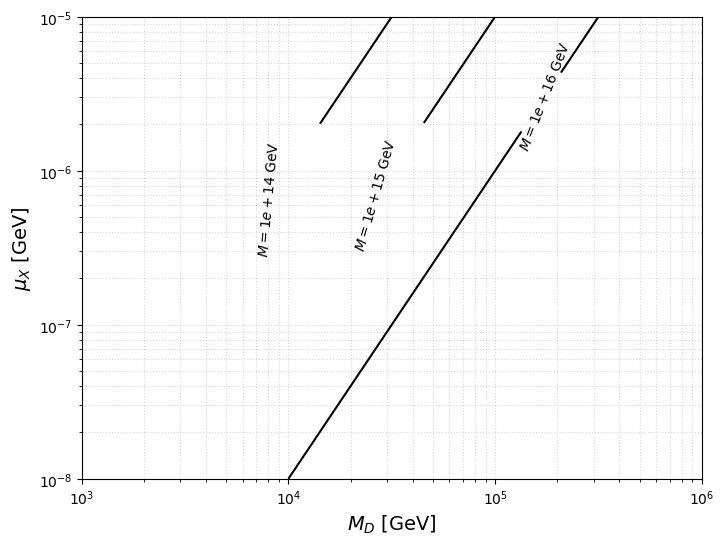

In [38]:
# Example usage with improved function
CS, ax = plot_inverse_seesaw_contours(
    muX_values=np.logspace(-8, -5, 100),
    MD_values=np.logspace(3, 6, 100),
    contour_masses=[1e14, 1e15, 1e16],
    linestyles='-',
    grid=True
)
plt.show()

In [39]:
# contour for M = MD^2/muX for M in [1e14, 1e15, 1e16] GeV in the plane (vR, muX)
def plot_inverse_seesaw_contours_vR(
    muX_values: np.ndarray,
    vR_values: np.ndarray,
    YR: float,
    contour_masses: list = [1e14, 1e15, 1e16],
    ax: Optional[plt.Axes] = None,
    colormap: str = 'viridis',
    contour_colors: Optional[str] = None,
    linewidths: float = 1.5,
    linestyles: str = '--',
    add_colorbar: bool = False,
    grid: bool = True,
    title: Optional[str] = None,
    save_path: Optional[str] = None,
    **kwargs
):
    """
    Plot contours of M = MD^2 / muX for given M values in the (vR, muX) plane, 
    with MD derived from vR and YR.
    
    Parameters:
    -----------
    muX_values : np.ndarray
        Array of muX values (in GeV)
    vR_values : np.ndarray
        Array of vR values (in GeV)
    YR : float
        Yukawa coupling to derive MD from vR
    contour_masses : list, optional
        List of M values to plot as contours (default: [1e14, 1e15, 1e16] GeV)
    ax : plt.Axes, optional
        Matplotlib axes object. If None, creates a new figure.
    colormap : str, optional
        Colormap for filled contours (default: 'viridis')
    contour_colors : str, optional
        Color for contour lines. If None, uses 'black' for simple contours.
    linewidths : float, optional
        Width of contour lines (default: 1.5)
    linestyles : str, optional
        Style of contour lines (default: '--')
    add_colorbar : bool, optional
        Whether to add a colorbar for M values (default: False)
    grid : bool, optional
        Whether to show grid (default: True)
    title : str, optional
        Plot title. If None, no title is added.
    save_path : str, optional
        Path to save the figure. If None, figure is not saved.
    **kwargs : dict
        Additional keyword arguments passed to contour()
        e.g., levels, alpha, etc.
    Returns:
    --------
    plt.Axes
        The axes object with the plot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create meshgrid
    vR_grid, muX_grid = np.meshgrid(vR_values, muX_values)
    MD_grid = YR * vR_grid / np.sqrt(2)
    M_grid = MD_grid**2 / muX_grid
    
    # Plot contours
    if contour_colors is None:
        contour_colors = 'black'
    
    CS = ax.contour(
        vR_grid, muX_grid, M_grid, 
        levels=contour_masses, 
        colors=contour_colors,
        linewidths=linewidths,
        linestyles=linestyles,
        **kwargs
    )
    
    # Add contour labels
    ax.clabel(
        CS, 
        inline=True, 
        fontsize=10, 
        fmt={level: f"$M={level:.0e}$ GeV" for level in contour_masses}
    )
    
    # Optionally add filled contours with colorbar
    if add_colorbar:
        CSf = ax.contourf(vR_grid, muX_grid, M_grid, levels=50, cmap=colormap, alpha=0.3)
        plt.colorbar(CSf, ax=ax, label=r"$M = M_D^2 / \mu_X$ [GeV]")
    
    # Set scales and labels
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$v_R$ [GeV]", fontsize=14)
    ax.set_ylabel(r"$\mu_X$ [GeV]", fontsize=14)
    
    # Add grid
    if grid:
        ax.grid(True, which="both", ls=":", alpha=0.5)
    
    # Add title if provided
    if title is not None:
        ax.set_title(title, fontsize=15)
    
    # Set axis limits
    ax.set_xlim(vR_values[0], vR_values[-1])
    ax.set_ylim(muX_values[0], muX_values[-1])
    
    # Save figure if path is provided
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    
    return CS, ax


(<matplotlib.contour.QuadContourSet at 0x7f694c8dd550>,
 <Axes: title={'center': 'Inverse Seesaw Contours in $(v_R, \\mu_X)$ Plane for $Y_R=0.1$'}, xlabel='$v_R$ [GeV]', ylabel='$\\mu_X$ [GeV]'>)

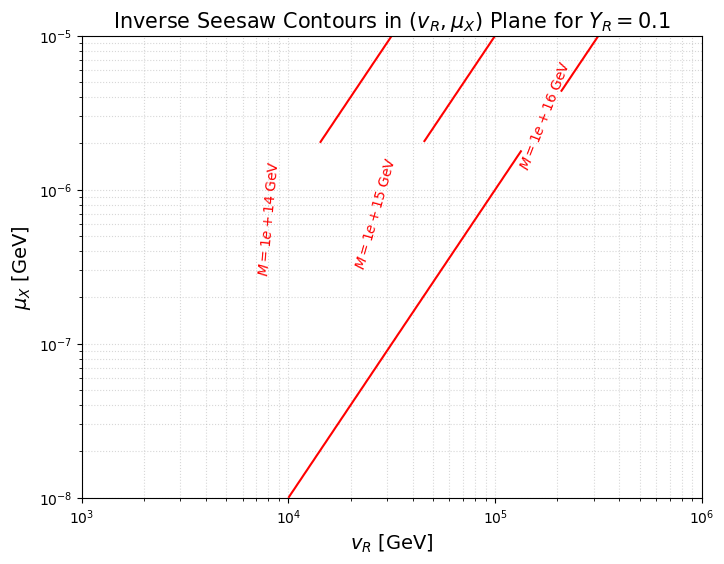

In [40]:
plot_inverse_seesaw_contours_vR(
    muX_values=np.logspace(-8, -5, 100),
    vR_values=np.logspace(3, 6, 100),
    YR=np.sqrt(2),
    contour_masses=[1e14, 1e15, 1e16],
    linestyles='-',
    grid=True,
    contour_colors='red',
    title=r"Inverse Seesaw Contours in $(v_R, \mu_X)$ Plane for $Y_R=0.1$"
)

## LFV decays 

In [41]:
plt.cm.winter(np.random.rand())

Plot saved to h_mutau_br_vs_vR_muX_1e-6.png


<Axes: xlabel='$v_R$ [GeV]', ylabel='$\\mathrm{BR}(h \\to \\mu\\tau)$'>

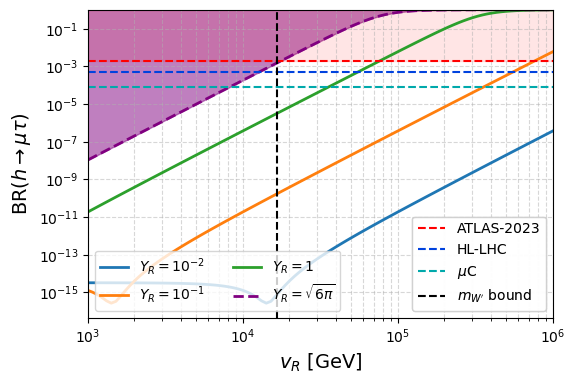

In [42]:
plot_h_mutau_br(
    vR_values=np.logspace(3, 6, 100),
    h_mutau_calc=h_mutau_calc,
    YR_list=[1e-2, 1e-1, 1],
    muX=1e-6,
    vR_min=vR_min,
    experimental_bound=h_mutau_calc.EXPERIMENTAL_BOUND,
    save_path="h_mutau_br_vs_vR_muX_1e-6.png",
    lw=2
)

Plot saved to meg_br_vs_vR_muX_1e-6.png


<Axes: xlabel='$v_R$ [GeV]', ylabel='$\\mathrm{BR}(\\mu \\to e\\gamma)$'>

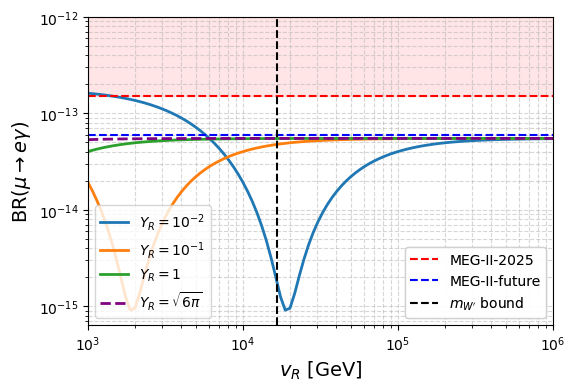

In [43]:
plot_meg_br(
    vR_values=np.logspace(3, 6, 100),
    meg_calc=meg_calc,
    YR_list=[1e-2, 1e-1, 1],
    muX=1e-6,
    vR_min=vR_min,
    experimental_bound=meg_calc.MEG_BOUND,
    save_path="meg_br_vs_vR_muX_1e-6.png",
    lw=2
)

Plot saved to h_mutau_br_vs_vR_YR_1.png


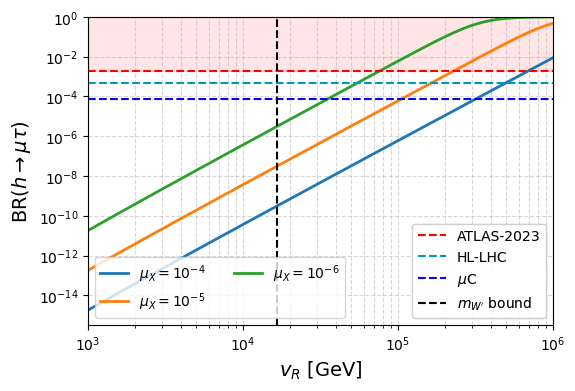

In [44]:
plot_h_mutau_br(
    vR_values=np.logspace(3, 6, 100),
    h_mutau_calc=h_mutau_calc,
    YR=1,
    muX_list=[1e-4, 1e-5, 1e-6],
    vR_min=vR_min,
    experimental_bound=h_mutau_calc.EXPERIMENTAL_BOUND,
    save_path="h_mutau_br_vs_vR_YR_1.png",
    lw=2
)
plt.show()

Plot saved to meg_br_vs_vR_YR_1.png


<Axes: xlabel='$v_R$ [GeV]', ylabel='$\\mathrm{BR}(\\mu \\to e\\gamma)$'>

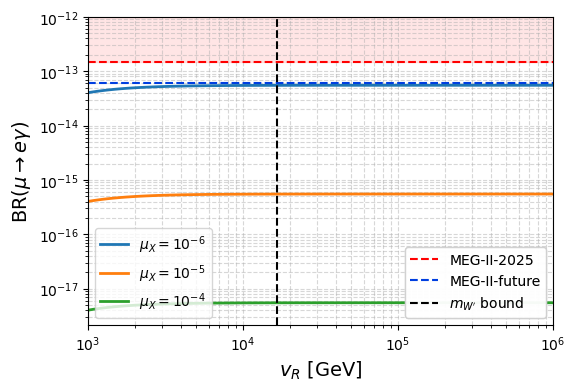

In [45]:
plot_meg_br(
    vR_values=np.logspace(3, 6, 100),
    meg_calc=meg_calc,
    YR=1.0,
    muX_list=[1e-6, 1e-5, 1e-4],
    vR_min=vR_min,
    experimental_bound=meg_calc.MEG_BOUND,
    save_path="meg_br_vs_vR_YR_1.png",
    lw=2
)

## Parameter Scan

In [46]:
def montecarlo_scan_log(
    N_points: int,
    vR_range: tuple,
    YR_range: tuple,
    muX_range: tuple,
    h_mutau_calc: HiggsToMuTauCalculator,
    meg_calc: MuonToEGammaCalculator,
    nu_params: NeutrinoParameters,
    experimental_bounds: dict = None,
    vR_min: float = None,
    batch_size: int = 1000,
    verbose: bool = True
):
    """
    Optimized Monte Carlo scan over (vR, YR, muX) parameter space using log-uniform sampling.
    Only keeps points allowed by both μ→eγ and h→μτ experimental bounds.
    
    Parameters:
    -----------
    N_points : int
        Total number of random points to sample
    vR_range : tuple
        Range for vR: (min, max) in GeV
    YR_range : tuple
        Range for YR: (min, max) dimensionless
    muX_range : tuple
        Range for muX: (min, max) in GeV
    h_mutau_calc : HiggsToMuTauCalculator
        Calculator for h→μτ branching ratio
    meg_calc : MuonToEGammaCalculator
        Calculator for μ→eγ branching ratio
    nu_params : NeutrinoParameters
        Neutrino parameters
    experimental_bounds : dict, optional
        Dictionary with experimental bounds for 'h_mutau' and 'meg'
    vR_min : float, optional
        Minimum vR from W' mass bound. If None, uses vR_range[0]
    batch_size : int, optional
        Number of points to process in each batch (default: 1000)
    verbose : bool, optional
        Whether to print progress (default: True)
    
    Returns:
    --------
    list
        List of dicts with allowed points and branching ratios
    """
    if experimental_bounds is None:
        experimental_bounds = {
            "h_mutau": h_mutau_calc.EXPERIMENTAL_BOUND,
            "meg": meg_calc.MEG_BOUND
        }
    
    if vR_min is None:
        vR_min = vR_range[0]
    
    # Pre-compute log ranges for faster sampling
    log_vR_min, log_vR_max = np.log10(vR_range[0]), np.log10(vR_range[1])
    log_YR_min, log_YR_max = np.log10(YR_range[0]), np.log10(YR_range[1])
    log_muX_min, log_muX_max = np.log10(muX_range[0]), np.log10(muX_range[1])
    
    results = []
    YR_pert_limit = h_mutau_calc.YR_PERTURBATIVE_LIMIT
    
    # Extract experimental bound values
    h_mutau_bound = experimental_bounds["h_mutau"]['ATLAS-2023']
    meg_bound = experimental_bounds["meg"]['MEG-II-2025']
    
    # Process in batches for better memory management and progress tracking
    n_batches = (N_points + batch_size - 1) // batch_size
    
    for batch_idx in range(n_batches):
        # Determine batch size (last batch may be smaller)
        current_batch_size = min(batch_size, N_points - batch_idx * batch_size)
        
        # Vectorized random sampling
        log_vR_samples = np.random.uniform(log_vR_min, log_vR_max, current_batch_size)
        log_YR_samples = np.random.uniform(log_YR_min, log_YR_max, current_batch_size)
        log_muX_samples = np.random.uniform(log_muX_min, log_muX_max, current_batch_size)
        
        vR_samples = 10 ** log_vR_samples
        YR_samples = 10 ** log_YR_samples
        muX_samples = 10 ** log_muX_samples
        
        # Pre-filter based on perturbativity and W' mass bound
        valid_mask = (YR_samples <= YR_pert_limit) & (vR_samples >= vR_min)
        
        # Process only valid points
        for idx in np.where(valid_mask)[0]:
            vR = vR_samples[idx]
            YR = YR_samples[idx]
            muX = muX_samples[idx]
            
            try:
                # Calculate branching ratios
                BR_h_mutau = h_mutau_calc.calculate_branching_ratio(vR, YR, muX)
                BR_meg = meg_calc.calculate_branching_ratio(vR, YR, muX)
                
                # Check experimental bounds
                if BR_h_mutau < h_mutau_bound and BR_meg < meg_bound:
                    results.append({
                        "vR": vR,
                        "YR": YR,
                        "muX": muX,
                        "BR_h_mutau": BR_h_mutau,
                        "BR_meg": BR_meg
                    })
            except Exception as e:
                # Skip points that cause errors in calculation
                if verbose and len(results) == 0:
                    print(f"Warning: Error at point (vR={vR:.2e}, YR={YR:.2e}, muX={muX:.2e}): {str(e)[:50]}")
                continue
        
        # Print progress
        if verbose and (batch_idx + 1) % max(1, n_batches // 10) == 0:
            progress = ((batch_idx + 1) * batch_size) / N_points * 100
            print(f"Progress: {min(progress, 100):.1f}% ({len(results)} allowed points found)")
    
    if verbose:
        print(f"Scan complete: {len(results)}/{N_points} points passed constraints ({len(results)/N_points*100:.2f}%)")
    
    return results

# Example usage with optimized parameters
import time
start_time = time.time()

scan_results_log = montecarlo_scan_log(
    N_points=10000,
    vR_range=(vR_min, 1e6),
    YR_range=(1e-2, h_mutau_calc.YR_PERTURBATIVE_LIMIT),
    muX_range=(1e-8, 1e-4),
    h_mutau_calc=h_mutau_calc,
    meg_calc=meg_calc,
    nu_params=nu_params,
    vR_min=vR_min,
    batch_size=500,  # Smaller batches for better progress tracking
    verbose=True
)

elapsed_time = time.time() - start_time
print(f"\nTotal time: {elapsed_time:.2f} seconds")
print(f"Average time per point: {elapsed_time/10000*1000:.2f} ms")
print(f"Allowed points (log scan): {len(scan_results_log)}")

Progress: 10.0% (448 allowed points found)
Progress: 20.0% (893 allowed points found)
Progress: 30.0% (1355 allowed points found)
Progress: 40.0% (1792 allowed points found)
Progress: 50.0% (2248 allowed points found)
Progress: 60.0% (2682 allowed points found)
Progress: 70.0% (3137 allowed points found)
Progress: 80.0% (3602 allowed points found)
Progress: 90.0% (4068 allowed points found)
Progress: 100.0% (4552 allowed points found)
Scan complete: 4552/10000 points passed constraints (45.52%)

Total time: 102.03 seconds
Average time per point: 10.20 ms
Allowed points (log scan): 4552


In [47]:
h_mutau_calc.EXPERIMENTAL_BOUND, meg_calc.MEG_BOUND

({'ATLAS-2023': 0.0018, 'HL-LHC': 0.0005, '$\\mu$C': 7.7e-05},
 {'MEG-II-2025': 1.5e-13, 'MEG-II-future': 6e-14})

In [48]:
# Convert results to structured array for easier analysis
import numpy as np
dtype = [('vR', float), ('YR', float), ('muX', float), ('BR_h_mutau', float), ('BR_meg', float)]
structured_results = np.array([tuple(d.values()) for d in scan_results_log], dtype=dtype)
print("Sample of allowed points:")
print(structured_results[:5])

Sample of allowed points:
[(109013.85424569, 0.55173268, 4.67929563e-05, 3.23632806e-07, 2.51206221e-17)
 ( 16633.66549303, 0.26934883, 2.03280574e-05, 2.91506748e-11, 1.29464205e-16)
 ( 32790.02658274, 0.02447934, 6.27322209e-07, 1.73406064e-11, 9.01089622e-14)
 ( 43486.99701584, 0.02341709, 1.63809931e-06, 7.35767964e-12, 1.51129702e-14)
 ( 32082.88433525, 0.34491271, 6.45981348e-05, 1.35037463e-10, 1.31067648e-17)]


INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNon

Saved: BR_h_mutau_correlations_journal.pdf and .png


INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode
INFO: Substituting symbol R from STIXNonUnicode


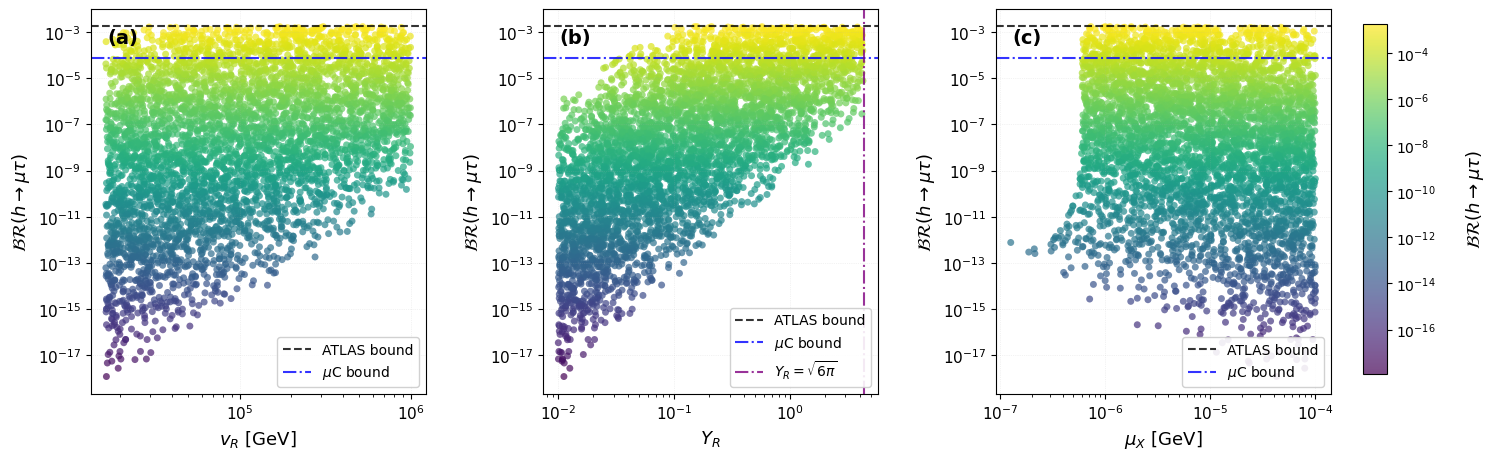


PARAMETER CORRELATION SUMMARY
Total allowed points: 4552
BR(h→μτ) range: [1.19e-18, 1.76e-03]
ATLAS-2023 bound: 1.80e-03

Points above ATLAS bound: 0 (0.0%)


In [69]:
# Journal-style figure: BR(h→μτ) correlation with vR, YR, and μX
# Three-panel publication-quality plot

if structured_results.size == 0:
    print("No allowed points to plot.")
else:
    # Extract data
    vR_arr = structured_results['vR']
    YR_arr = structured_results['YR']
    muX_arr = structured_results['muX']
    BR_h_mutau_arr = structured_results['BR_h_mutau']
    
    # Create figure with 3 horizontal panels
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # Set consistent color normalization for BR(h→μτ)
    norm = mpl.colors.LogNorm(vmin=max(BR_h_mutau_arr.min(), 1e-18), 
                              vmax=BR_h_mutau_arr.max())
    cmap = 'viridis' #'RdYlBu_r'  # Red-Yellow-Blue reversed (red=high, blue=low)
    
    # ------------------------------------------------------------------
    # Panel (a): BR vs vR
    # ------------------------------------------------------------------
    sc1 = axes[0].scatter(vR_arr, BR_h_mutau_arr, 
                          c=BR_h_mutau_arr, cmap=cmap, norm=norm,
                          s=25, alpha=0.7, edgecolor='none', rasterized=True)
    
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_xlabel(r'$v_R$ [GeV]', fontsize=13)
    axes[0].set_ylabel(r'$\mathcal{BR}(h \to \mu\tau)$', fontsize=13)
    axes[0].grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
    axes[0].tick_params(labelsize=11)
    axes[0].text(0.05, 0.95, '(a)', transform=axes[0].transAxes, 
                 fontsize=14, fontweight='bold', va='top')
    
    # Add experimental bound
    axes[0].axhline(h_mutau_calc.EXPERIMENTAL_BOUND['ATLAS-2023'], 
                    color='black', linestyle='--', linewidth=1.5, 
                    label='ATLAS bound', alpha=0.8)
    # Add muC limit line
    axes[0].axhline(h_mutau_calc.EXPERIMENTAL_BOUND['$\\mu$C'], 
                    color='blue', linestyle='-.', linewidth=1.5, 
                    label='$\\mu$C bound', alpha=0.8)
    axes[0].legend(loc='lower right', fontsize=10, framealpha=0.9)
    
    # ------------------------------------------------------------------
    # Panel (b): BR vs YR
    # ------------------------------------------------------------------
    sc2 = axes[1].scatter(YR_arr, BR_h_mutau_arr, 
                          c=BR_h_mutau_arr, cmap=cmap, norm=norm,
                          s=25, alpha=0.7, edgecolor='none', rasterized=True)
    
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].set_xlabel(r'$Y_R$', fontsize=13)
    axes[1].set_ylabel(r'$\mathcal{BR}(h \to \mu\tau)$', fontsize=13)
    axes[1].grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
    axes[1].tick_params(labelsize=11)
    axes[1].text(0.05, 0.95, '(b)', transform=axes[1].transAxes, 
                 fontsize=14, fontweight='bold', va='top')
    
    # Add experimental bound
    axes[1].axhline(h_mutau_calc.EXPERIMENTAL_BOUND['ATLAS-2023'], 
                    color='black', linestyle='--', linewidth=1.5, 
                    label='ATLAS bound', alpha=0.8)
    # Add muC limit line
    axes[1].axhline(h_mutau_calc.EXPERIMENTAL_BOUND['$\\mu$C'], 
                    color='blue', linestyle='-.', linewidth=1.5, 
                    label='$\\mu$C bound', alpha=0.8)

    # Add perturbativity limit
    axes[1].axvline(h_mutau_calc.YR_PERTURBATIVE_LIMIT, 
                    color='purple', linestyle='-.', linewidth=1.5,
                    label=r'$Y_R = \sqrt{6\pi}$', alpha=0.8)
    axes[1].legend(loc='lower right', fontsize=10, framealpha=0.9)
    
    # ------------------------------------------------------------------
    # Panel (c): BR vs μX
    # ------------------------------------------------------------------
    sc3 = axes[2].scatter(muX_arr, BR_h_mutau_arr, 
                          c=BR_h_mutau_arr, cmap=cmap, norm=norm,
                          s=25, alpha=0.7, edgecolor='none', rasterized=True)
    
    axes[2].set_xscale('log')
    axes[2].set_yscale('log')
    axes[2].set_xlabel(r'$\mu_X$ [GeV]', fontsize=13)
    axes[2].set_ylabel(r'$\mathcal{BR}(h \to \mu\tau)$', fontsize=13)
    axes[2].grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
    axes[2].tick_params(labelsize=11)
    axes[2].text(0.05, 0.95, '(c)', transform=axes[2].transAxes, 
                 fontsize=14, fontweight='bold', va='top')
    
    # Add experimental bound
    axes[2].axhline(h_mutau_calc.EXPERIMENTAL_BOUND['ATLAS-2023'], 
                    color='black', linestyle='--', linewidth=1.5, 
                    label='ATLAS bound', alpha=0.8)
    # Add muC limit line
    axes[2].axhline(h_mutau_calc.EXPERIMENTAL_BOUND['$\\mu$C'], 
                    color='blue', linestyle='-.', linewidth=1.5, 
                    label='$\\mu$C bound', alpha=0.8)
    axes[2].legend(loc='lower right', fontsize=10, framealpha=0.9)
    
    # ------------------------------------------------------------------
    # Shared colorbar
    # ------------------------------------------------------------------
    # Add colorbar spanning all panels
    fig.subplots_adjust(right=0.90, wspace=0.35)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
    cbar = fig.colorbar(sc1, cax=cbar_ax)
    cbar.set_label(r'$\mathcal{BR}(h \to \mu\tau)$', fontsize=13, rotation=90, labelpad=20)
    cbar.ax.tick_params(labelsize=10)
    
    # Overall title (optional - uncomment if needed for presentation)
    # fig.suptitle('Parameter Correlations with BR$(h \\to \\mu\\tau)$', 
    #              fontsize=15, fontweight='bold', y=0.98)
    
    plt.savefig('BR_h_mutau_correlations_journal.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('BR_h_mutau_correlations_journal.png', dpi=300, bbox_inches='tight')
    print("Saved: BR_h_mutau_correlations_journal.pdf and .png")
    
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*70)
    print("PARAMETER CORRELATION SUMMARY")
    print("="*70)
    print(f"Total allowed points: {len(vR_arr)}")
    print(f"BR(h→μτ) range: [{BR_h_mutau_arr.min():.2e}, {BR_h_mutau_arr.max():.2e}]")
    print(f"ATLAS-2023 bound: {h_mutau_calc.EXPERIMENTAL_BOUND['ATLAS-2023']:.2e}")
    print(f"\nPoints above ATLAS bound: {np.sum(BR_h_mutau_arr > h_mutau_calc.EXPERIMENTAL_BOUND['ATLAS-2023'])} "
          f"({np.sum(BR_h_mutau_arr > h_mutau_calc.EXPERIMENTAL_BOUND['ATLAS-2023'])/len(vR_arr)*100:.1f}%)")
    print("="*70)

muC bound on BR(h → μτ): 7.7e-05
MEG-II bound on BR(μ → eγ): 6e-14


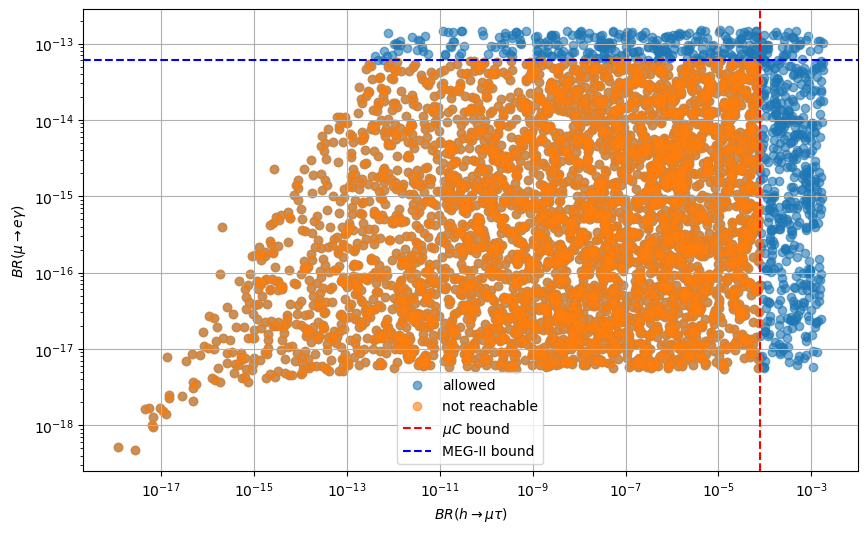

In [53]:
# Plot allowed points in plane BR(h → μτ) vs BR(μ → eγ)
import matplotlib.pyplot as plt

BR_h_mutau = structured_results['BR_h_mutau']
BR_meg = structured_results['BR_meg']

muC_bound_htomutau = h_mutau_calc.EXPERIMENTAL_BOUND['$\\mu$C']
MEG_II_meg_bound = meg_calc.MEG_BOUND['MEG-II-future']
print(f"muC bound on BR(h → μτ): {muC_bound_htomutau}")
print(f"MEG-II bound on BR(μ → eγ): {MEG_II_meg_bound}")

# Create masks for projected and not reachable regions
#mask_proyected = (BR_h_mutau > muC_bound_htomutau) & (BR_meg > MEG_II_meg_bound)
mask_not_available = (BR_h_mutau <= muC_bound_htomutau) & (BR_meg <= MEG_II_meg_bound)

plt.figure(figsize=(10, 6))
plt.scatter(BR_h_mutau, BR_meg, alpha=0.6, label='allowed')
#plt.scatter(BR_h_mutau[mask_proyected], BR_meg[mask_proyected], alpha=0.6, label='projected')
plt.scatter(BR_h_mutau[mask_not_available], BR_meg[mask_not_available], alpha=0.6, label='not reachable')

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$BR(h \to \mu\tau)$")
plt.ylabel(r"$BR(\mu \to e \gamma)$")
plt.axvline(muC_bound_htomutau, color='red', ls='--', label=r"$\mu C$ bound")
plt.axhline(MEG_II_meg_bound, color='blue', ls='--', label='MEG-II bound')
#plt.title(r"Allowed Points: $BR(h \to \mu\tau)$ vs $BR(\mu \to e \gamma)$")
plt.grid()
plt.legend()
plt.show()

In [54]:
h_mutau_calc.EXPERIMENTAL_BOUND, meg_calc.MEG_BOUND

({'ATLAS-2023': 0.0018, 'HL-LHC': 0.0005, '$\\mu$C': 7.7e-05},
 {'MEG-II-2025': 1.5e-13, 'MEG-II-future': 6e-14})